In [1]:
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis — or EDA as we call it — is an important process within every data science project that involves exploring the data and understanding its characteristics.

EDA helps in obtaining hidden insights of the dataset, the distribution of each features and the interaction between various features.

EDA also helps in cleaning your data before using the same for model building as cleaned data is a must for the model to efficiently generalize and understand the patterns within the data.

In this article, I will be explaining the basic steps to perform an exploratory data analysis of a data. Also as we humans are mostly visual learners, I will be explaining various visualization techniques that will aid you in understanding the data in a better way.

In the final section, I will be explaining how you should ask the right questions and explore your data to get meaningful and hidden insights that will help solve the problem at hand with ease.

Now, before proceeding with EDA, the first step is to load the necessary libraries and then upload the dataset.

In this article, we will be using Numpy, Pandas, Matplotlib and Seaborn libraries. Uploading them using the code below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Instead of uploading a dataset, we shall go with the inbuilt Titanic dataset in seaborn.

In [3]:
df = sns.load_dataset('titanic')

You can confirm whether the dataset has been loaded or not by looking at few rows of the data. For that, you can use:

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


".head()" method will show the first 5 rows of the dataframe.

In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


".tail()" method shows the last 5 rows of the dataframe.

In [ ]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
427,1,2,female,19.0,0,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
472,1,2,female,33.0,1,2,27.7500,S,Second,woman,False,NaN,Southampton,yes,False
716,1,1,female,38.0,0,0,227.5250,C,First,woman,False,C,Cherbourg,yes,True
424,0,3,male,18.0,1,1,20.2125,S,Third,man,True,NaN,Southampton,no,False


".sample()" will show random samples of the dataframe. You can pass the number of samples to be shown as the argument. Here, I have selected 5 samples.

Once you have viewed the data, you now know what all features are present and how they are represented in the dataframe. You can also spot any incosistencies in the data using this method.

Next comes the basic data exploration part and I'll summarise the steps here and explain each one by one.

# Basic Data Exploration

1. Checking the shape of the data
2. Checking the columns of the data
3. Checking the datatypes
4. Looking for missing values
5. Putting it all together
6. Looking for duplicates
7. Statistical description of the data

### Checking the shape of the data

The ".shape" attribute returns the overall shape of the data as a tuple with 2 elements.
The first element denotes the number of rows of observations and the second element denotes the number of columns in the dataset.

Let's check the shape of our data

In [ ]:
df.shape

(891, 15)

We have 891 rows of observations and 15 columns in our data.

### Checking the columns of the data

The ".columns" attribute returns an object that lists all the column names of the data.

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Checking the datatypes

The ".dtypes" attribute lists all the column names in the data along with their corresponding data types.

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Here, you should look whether all the columns have been assigned with the appropriate datatypes. Also focus more on "object" datatypes. These are basically strings but can be numbers or categories or dates or boolean values.

You have to ensure that all the columns have been properly assigned with the right datatypes.

### Looking for missing values

The ".isnull()" method will show us the missing values within the dataframe.

In [ ]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


But identifying missing values based on this alone is not a feasible approach. For that, we can either use the ".sum()" or ".any()" method along with ".isnull()" method.

"isnull().any()" will summarize whether the column contains any missing values or not and ".isnull().sum()" will give the count of missing values per column.

In [ ]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Putting it all together

Now, we know how to check the shape of the data, number of columns, column names, datatypes and missing values using seperate methods for each.

".info()" method summarizes all these into a single table. Along with that, it also lists out the number of features per each datatype and the total memory used by the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


We can summarize the table as:

1. Number of observations: 891
2. Number of columns: 15
3. Memory Usage: 80.7+ KB
4. Number of boolean columns: 2
4. Number of category columns: 2
4. Number of float columns: 2
4. Number of int columns: 4
4. Number of object columns: 5
5. Number of columns with missing values: 4
6. Colums with missing values: age, embarked, deck, embark_town

### Looking for duplicates

Now that we have an overall idea of how our data looks like, we will check if there are any duplicate values inside our data using ".duplicated()" attribute.

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

To get the total count of duplicate values, add ".sum()" attribute to the end.

In [ ]:
df.duplicated().sum()

107

### Statistical description of the data

Until now we were exploring the data and checking its quality, but from now on will be using Statistical Techniques to explore the data and check the composition and distribution of each feature.

A quick way of getting the statistical summary of all the columns in a dataframe is by using the ".describe()" method.

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By default, ".describe()" method will show the statistical summary for numerical features only.

For getting the summary of categorical features, pass the argument "include='category'" inside the ".describe()" method.

In [5]:
df.skew()

survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [ ]:
df.describe(include="category")

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


If you want to have both together, pass the argument "include='all'" inside the ".describe()" method.

In [ ]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The numerical description of the data helps us in understanding the statistical parameters like the mean, median, and mode. It also helps in understanding the skewness of the data and whether there are outliers or not and also in understanding the range of values within each column.

Whereas the description of categorical data helps us in understanding the count of each column, the number of unique values in it and the most frequent value within each column.

# Exploring the data using Visualizations

Now that you have understood how to explore the data without using any visualization techniques, we will explore how this can be done using various data plots.

There are multiple plots available that can be used for exploring and visualizing the distribution or the composition of each feature and its corresponding observations.

In this article we will be using the most frequently used and the most important visualisation techniques that can be used for understanding and exploring the data.

## Exploring Numerical Data

### Histogram

The distribution of a feature refers to how often the values in that feature occur. The most important visualization technique for viewing continuous features is the histogram.

A histogram groups the continuous data into bins and displays the count of data within each bin.

Let's explore the distribution of "age" column in our data using histogram.
We will be using matplotlib and seaborn libraries interchangeably for creating plots.

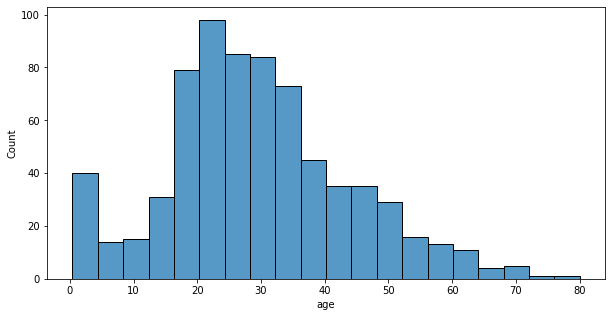

In [ ]:
# checking the distribution of 'age'
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.show()

We can see that this histogram is showing the distribution of "age" but have you noticed that the number of bins is random. We can see that the distribution of "age" ranges from 0 to 80 and hence we can provide the number of bins as 80 so that each bin represents 1 year in age.

Let's see how that looks like.

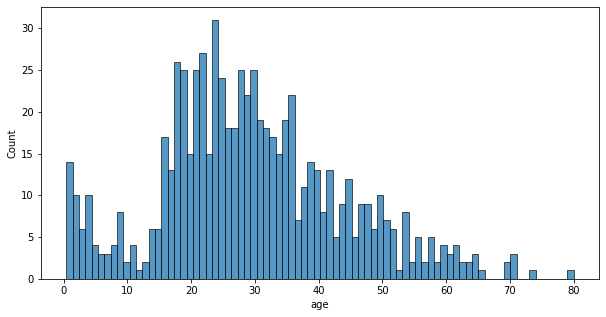

In [ ]:
# checking the distribution of 'age'
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=80)
plt.show()

Notice how the distribution changed, and now you can see the peaks and troughs with respect to each age group.

Let's now plot the same histogram with respect to an age gap of 10 years and see how it looks.

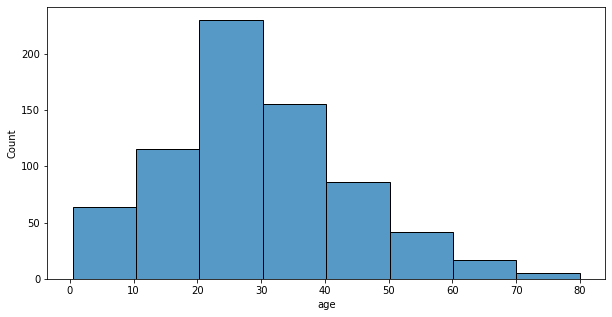

In [ ]:
# checking the distribution of 'age'
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=8)
plt.show()

Now we can see that the first plot failed to give us a clear picture of the distribution and we get to know that the most number of observations are between the ages of 20 and 30.

The second plot gave the detailed information with respect to each age group and now we know that most of the observations are for the age group of 24 years.

The third plot gave us a high level overview of the distibution of age within each decade of year gap.

From this we get to know that, the right number of bins matter when making a decision out of exploring the data using a histogram.

If you want to view the histogram of all the numerical features in the data, use the ".hist()" method on the dataframe.

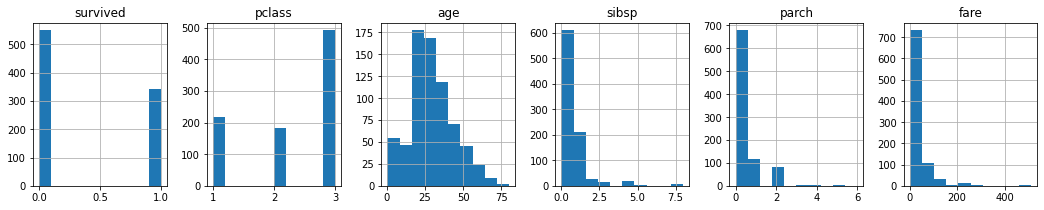

In [ ]:
df.hist(layout=(1,6), figsize=(18,3))
plt.show()

### Boxplot

A boxplot helps in understanding the percentile distribution of the data. In fact, it is one of the best tools to visualize the outliers in the data. Let's check the boxplot of 'age' feature in our data.

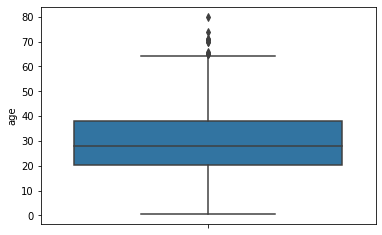

In [ ]:
sns.boxplot(data=df, y='age')
plt.show()

By passing another variable in the other axis, we can compare the boxplot of the variable across the classes in other variable. For example, the figure below shows the boxplot distribution of 'age' across 'pclass' variable.

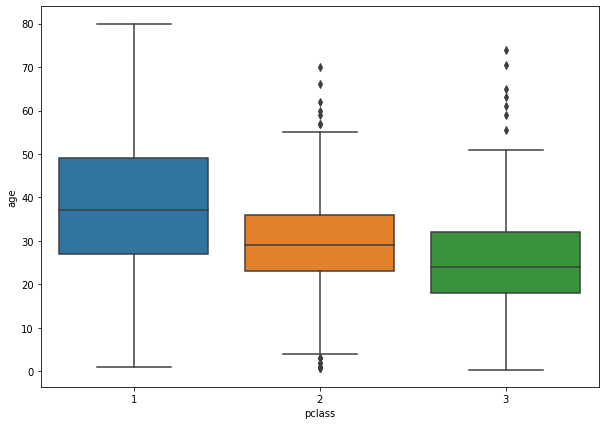

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='age', x='pclass')
plt.show()

By providing a hue parameter, we can even view the same with respect to another variable. Below figure shows the plot withe respect to 'survived' variable.

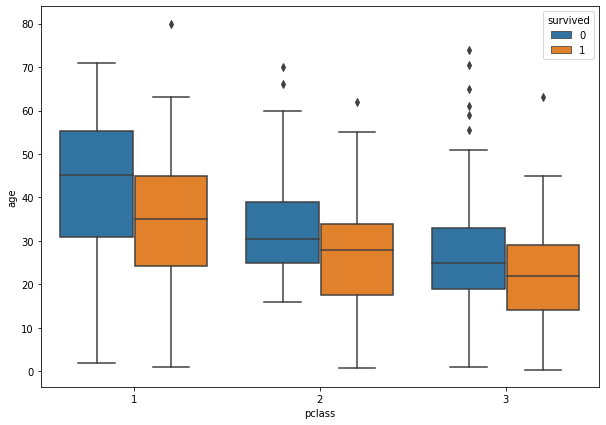

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='age', x='pclass', hue='survived')
plt.show()

The boxplot is made up of two whiskers and a box. The first whisker starts at
the minimum value and goes until it reaches the first quantile Q1, which marks the beginning of the box. Therefore the first whisker covers the bottom 25% or first quartile of observations.

The box ranges from first quantile Q1 to third quantile Q3, covering the middle half — second quantile — of the observations. The height of the box is called the Inter Quartile Range (IQR), which is a measure of dispersion that tells us the distribution of the mid 50% of the observations. The middle line of the box represents the median of the distribution and the upper whisker denotes the maximum value.

The dots (if present) above the upper whisker and below the lower whisker represents the outlier values.

While a box plot shows you the data corresponding to second quartile region, a boxen plot will show the data distribution across all quantiles from 10 to 90. It shows much clearer picture compared to a box plot.

The figure below shows the boxen plot of the 'age' variable.

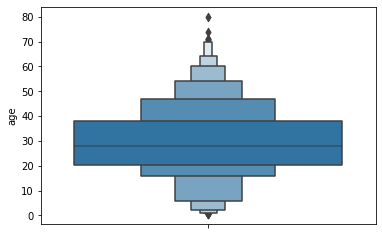

In [ ]:
sns.boxenplot(data=df, y='age')
plt.show()

Just like we visualized the box plot for 'pclass', we can create the same for boxenplot as well.

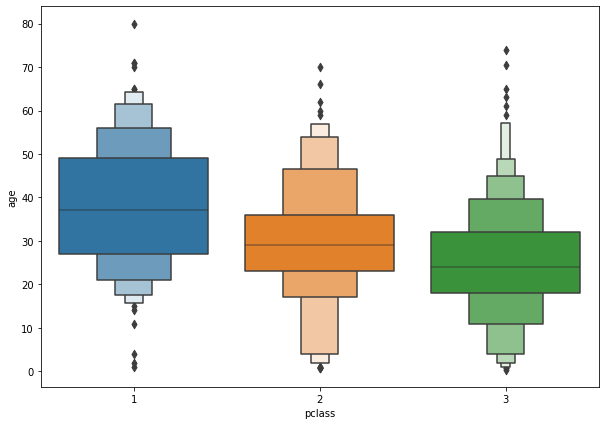

In [ ]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=df, y='age', x='pclass')
plt.show()

Again, visualizing the boxen plots with respect to 'survived' variable just like we did for box plot.

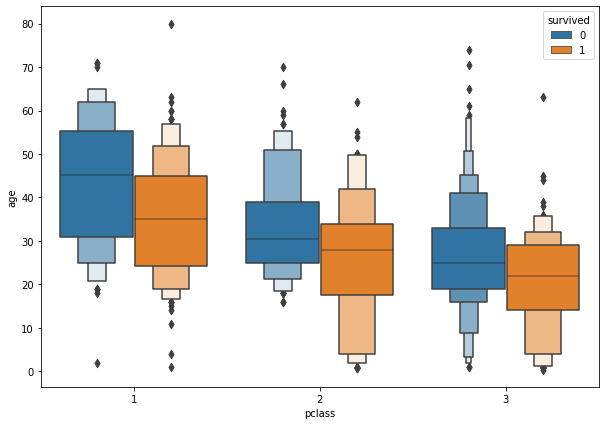

In [ ]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=df, y='age', x='pclass', hue='survived')
plt.show()

Yet another kind of plot that looks similar to a box plot is the violin plot. Unlike a box plot that plots the raw distribution count, a violin plot plots the smoothed out probability density distribution of a variable across various quantiles.

Let's see how that works by plotting it for the 'age' feature.

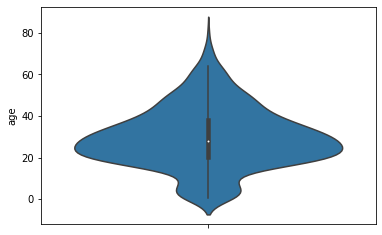

In [ ]:
sns.violinplot(data=df, y='age')
plt.show()

Just like we visualized box plot and boxen plot for 'pclass', we can do the same with violin plots as well.

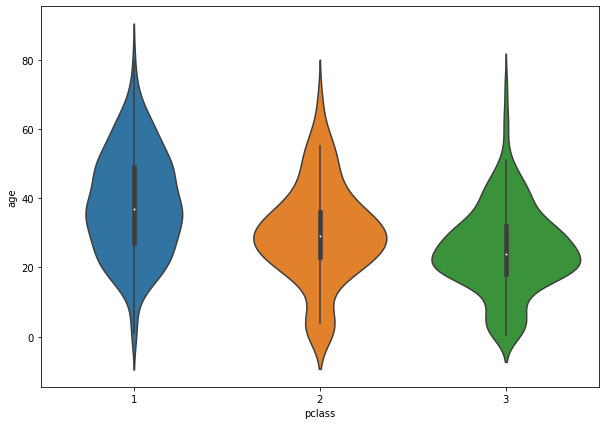

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df, y='age', x='pclass')
plt.show()

Not only that, we can also split view the plot with respect to a third variable as well.

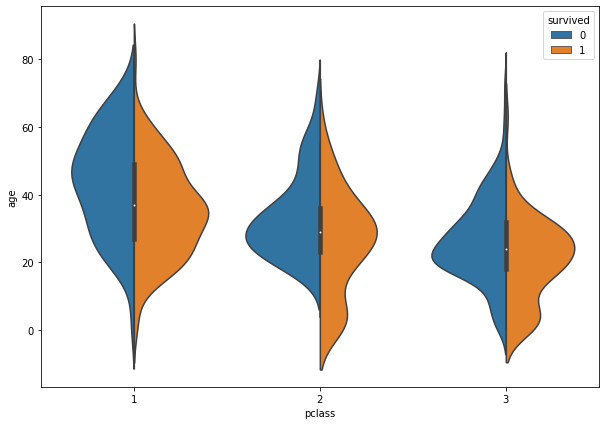

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df, y='age', x='pclass', hue='survived', split=True)
plt.show()

### Scatter Plot

While histograms and boxplots show you the distribution of numerical variables, a scatter plot shows the interaction happening between two numerical variables. Let's understand this by looking at the interaction between 'age' and 'fare'

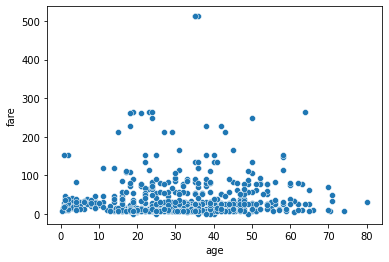

In [ ]:
sns.scatterplot(x=df['age'], y=df['fare'])
plt.show()

In this plot, we find that there is not much relationship (weak correlation) between age and fare except that the maximum fare per age group is found to be the lowest for people aged 70 and above.

Let's visualize how this looks with respect to 'sex'

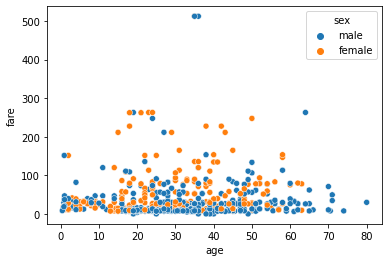

In [ ]:
sns.scatterplot(data=df, x='age', y='fare', hue='sex')
plt.show()

Do you find something interesting here? You can see that most of the high priced tickets have been bought by females and the two highest priced tickets have been bought by males. It would be interesting to know the reason why they did so right?
But, that is an excercise for you and you can comment your answers in the comment section.

So, a strongly correlated numerical variables will show linear plots with a negative or a positive slope.

The plot below shows the relationship between two highly correlated numerical features.

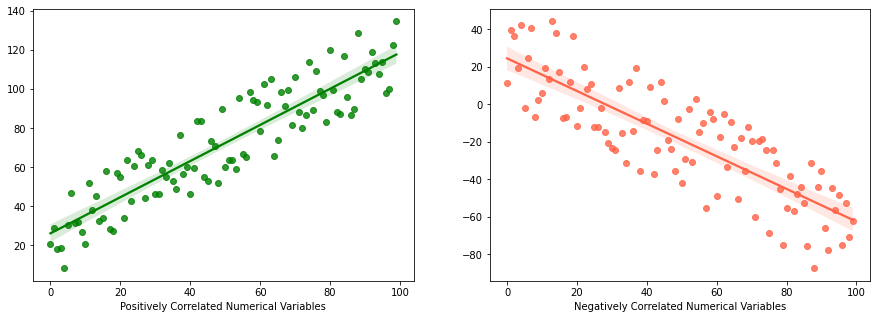

In [ ]:
x=list(np.arange(100))
y1=[i+(43.17*np.random.random()) for i in x]
y2=[(57.39*np.random.random())-i for i in x]
plt.subplots(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.xlabel('Positively Correlated Numerical Variables')
sns.regplot(x=x,y=y1, color='green')
ax2 = plt.subplot(1,2,2)
sns.regplot(x=x,y=y2, color='tomato')
plt.xlabel('Negatively Correlated Numerical Variables')
plt.show()

### Multivariate Plots

Until now, we have looked at univariate and bi-variate plots. Now lets focus on multivariate plots.

The first one is known as pair plot. A pair plot is just a collection of distributions of all the numerical variables. Using a pairplot, we can visualize both univariate distribution and bivariate correlation of all the numerical variables in a single plot. This is good for small datasets, but for datasets with more than 10 features, it would be better to view the distributions and correlations individually than depending on a pair plot.

Let's see how the pairplot for the numerical variables in our dataset looks like.

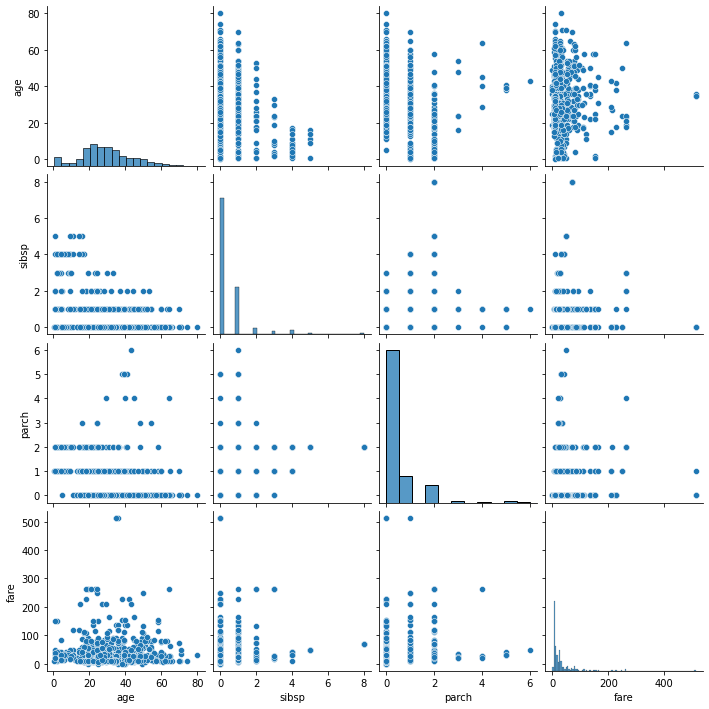

In [ ]:
sns.pairplot(df[['age','sibsp','parch','fare']])
plt.show()

### Heatmaps

A scatter plot shows you whether two variables are correlated or not, but it fails to tell you how much they are correlated with each other. To find that, you can make use of a heatmap and plot the correlation matrix.

Let's see how that works on our numerical variables.

We first create a correlation matrix using ".corr()" method.

In [ ]:
correlation_matrix = df[['age','sibsp','parch','fare']].corr()
correlation_matrix

,age,sibsp,parch,fare
age,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.308247,1.000000,0.414838,0.159651
parch,-0.189119,0.414838,1.000000,0.216225
fare,0.096067,0.159651,0.216225,1.000000


Now, we pass this correlation matrix on to the heatmap. Passing the argument "annot=True" will show the Pearson correlation coefficient values for each variable interaction, within the heatmap.

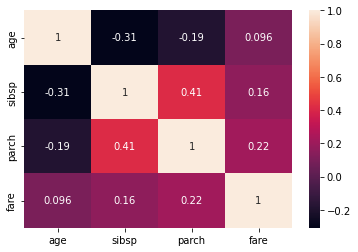

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In this heatmap, we can find that there are not much extremely correlated variables. But we also see that the highest correlated features are 'sibsp' and 'parch'.

We can now make use of the scatter plot to view the interaction between these two variables.

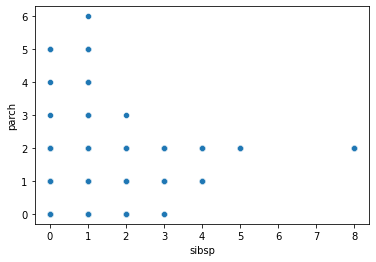

In [ ]:
sns.scatterplot(x=df['sibsp'], y=df['parch'])
plt.show()

You can also confirm this interaction by looking at the pairplot plotted abvove. Since you know how to interpret this chart, I leave this as an excercise for the reader to write down your observations in the comment section.

## Exploring Categorical Data

Each categorical variable comprises of two or more classes of that variable. To check the number of classes within a categorical variable and the number of observations corresponding to each class, we can make use of ".value_counts()" method.

Let's inspect the composition of 'embark_town' variable using ".value_counts()" method.

In [ ]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

We find that 'embark_town' variable consists of three classes named Southampton, Cherbourg and Queenstown. These are the places from where passengers onboarded the Titanic. You can also find the number of observations corresponding to each class.

But, let's visualize the categorical data using various plots.

### Bar Plot

Bar plots are the best way of visualizing the statistical parameters (count) of a categorical variable. A bar plot can be constructed by passing the variable in one axis and the corresponding value on the other.

Let's plot the composition of 'embark_town' using bar plots and see how it looks.

For that, we will pass the values in y-axis and their corresponding index in x-axis.

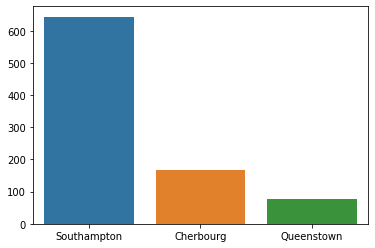

In [ ]:
sns.barplot(x=df['embark_town'].value_counts().index,
            y=df['embark_town'].value_counts().values)
plt.show()

Now, the data looks better and clean. We can get the same results in an easier way by using a variation of bar plot which is known as countplot. For a countplot, you just have to input the dataframe and the corresponding variable name only. There is no need to input the values and its corresponding index like we did it for the bar plot.


Let's see how to create the same visualization using the countplot.

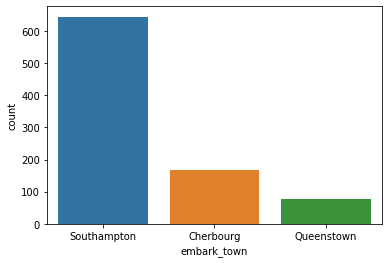

In [ ]:
sns.countplot(data=df, x='embark_town')
plt.show()

Notice how both the plot are representing the same information.

Now, what if we want to know only the percentage values or the share of each class and not the count. In that case, we can make use of pie chart.

### Pie Chart

To create a pie chart, we will have to provide the values and it corresponding index, just like we did it for creating a bar plot. And if you want to know the % values in the pie chart, pass the "autopct" attribute value within the api.

Let's see how its done.

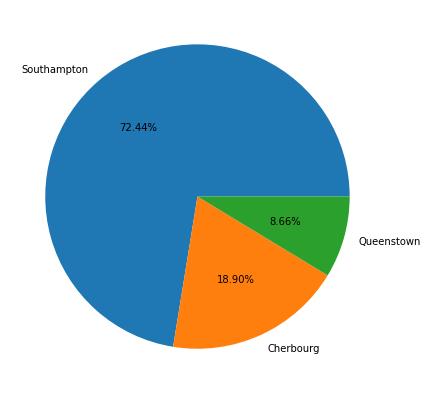

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(x=df['embark_town'].value_counts().values,
        labels=df['embark_town'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

Now we know the share of each class within the 'embark_town' variable and we know that most of the people boarded the Titanic from Southampton and the least from Queenstown.

Bar plots and Pie charts are more than enough to represent the composition of univariate categorical data.

What if we want to understand the composition of two categorical variables.

### Crosstab

Crosstab aggregates the count of each class of a variable with respect to each class of another.

Confused ?

Let's see that in action.

Suppose that we want to know the number of people who survived the disaster based on their place of boarding. We can create a crosstab of the same as follows.

In [ ]:
pd.crosstab(index=df['survived'], columns=df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
survived,,,
0,75,47,427
1,93,30,217


But what if we want to visualize this as a bar chart? In that case, you can create a facet grid and map the bar chart data into it.

Let's see how its done.

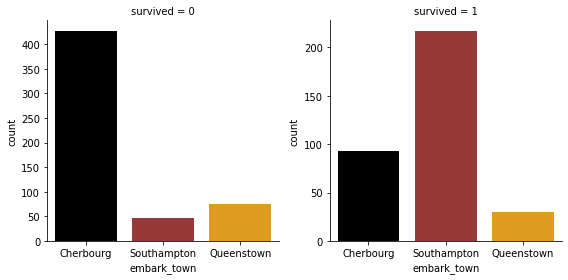

In [ ]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='survived', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'embark_town', palette=['black', 'brown', 'orange'])
plt.show()

Now you can clearly see that people who boarded the Titanic from Southampton were the majority among the survived. But do you think they were the most among the survived in terms of percentage?

Im leaving this question for you to answer in the comments section.

Now, we have seen how to visualize and explore the categorical variables. We have also came a long way in understanding the steps using which we can perform exploratory data analysis. But, we have left one more step to cover. Of course there are many, but this one would be something that you're thinking in your mind.

How can we know the interaction between a numerical and a categorical variable? Well no worries, we will be covering that next.

## Interaction between Numerical and Categorical variables

To view the interaction between a numerical and a categorical plot, you only have to create a normal plot and pass one of them as the seperator.

Confused?

Its simple. Say we want to create the distribution of a numerical feature 'age, and you want to see how this distribution varies with the respect to the people who have survived or not. So we will create a histogram for 'age' and we will pass the 'survived' variable as a separating parameter and visualise it.

Let's see how this is done.

### Histogram

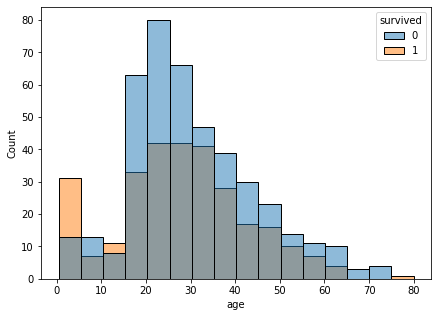

In [ ]:
# creating the histogram of 'age'
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='age', bins=16, hue='survived')
plt.show()

We can clearly see a pattern in this plot. We see that of the people who have survived, most of them were children below the age of 15yrs and senior adults above the age of 75.

Similarly, you can visualize how each numerical variable interacts with respect to a categorical variable using a strip plot or a swarmplot.

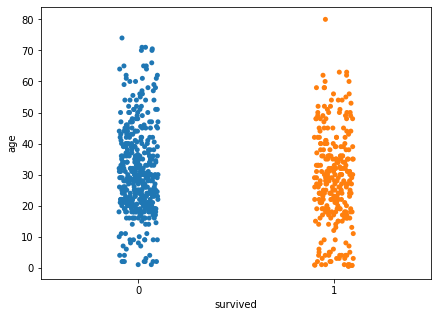

In [ ]:
# visualizing a strip plot
plt.figure(figsize=(7,5))
sns.stripplot(data=df, x='survived', y='age')
plt.show()

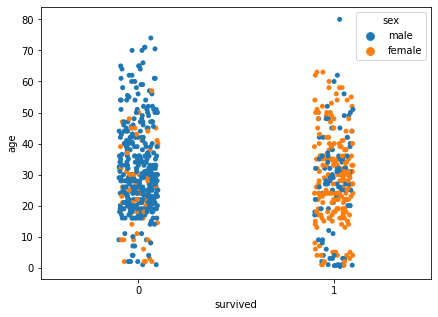

In [ ]:
plt.figure(figsize=(7,5))
sns.stripplot(data=df, x='survived', y='age', hue='sex')
plt.show()

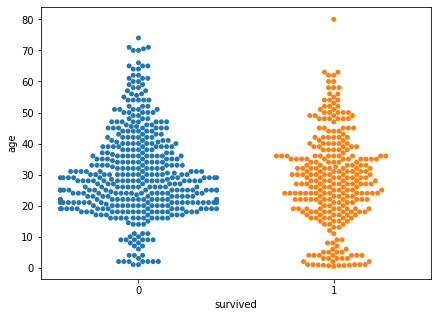

In [ ]:
# visualizing a swarm plot
plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x='survived', y='age')
plt.show()

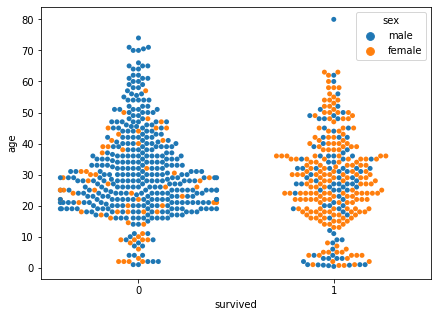

In [ ]:
plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x='survived', y='age', hue='sex')
plt.show()

You can even go multiple steps in adding other features for visualizing the same plot. Let's check that with respect to a scatter plot.

We start by creating a scatter plot between 'age' and 'fare' and we keep on adding other features and see how the figure changes and shows us the hidden pattern.

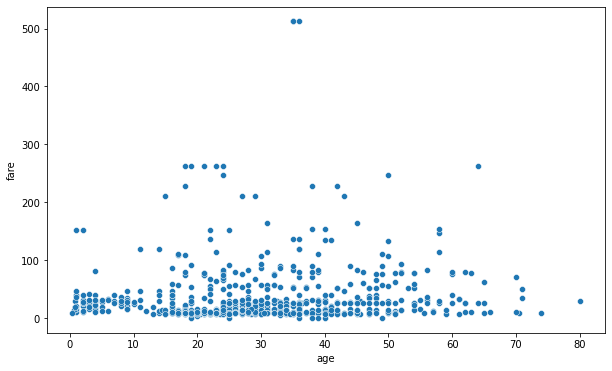

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='fare')
plt.show()

Adding 'sex' variable as 'hue' parameter.

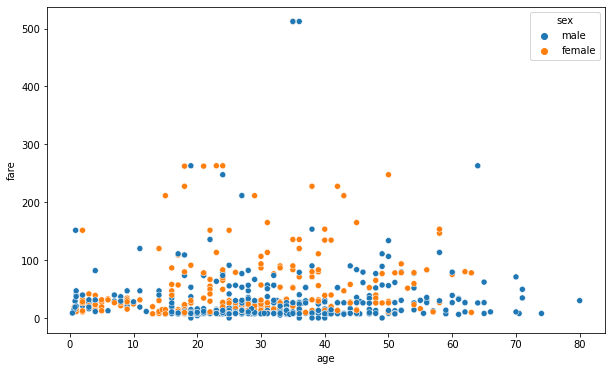

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='fare', hue='sex')
plt.show()

Adding 'pclass' variable as 'size' parameter.

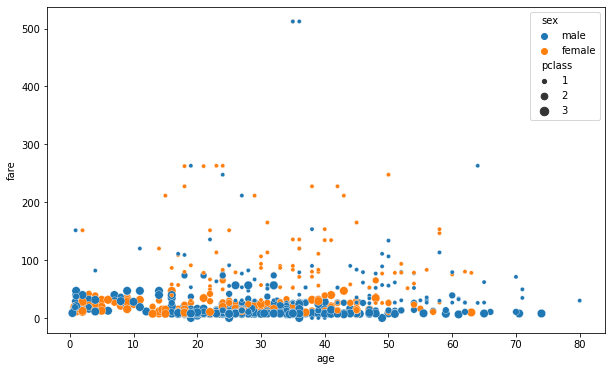

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='fare', hue='sex', size='pclass')
plt.show()

Adding 'alone' variable as 'style' parameter.

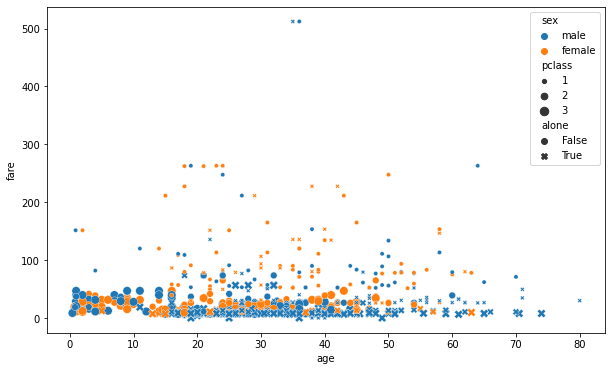

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='fare', hue='sex', size='pclass', style='alone')
plt.show()

How about we plot the above with respect to 'embark_town'. Here's how its done.

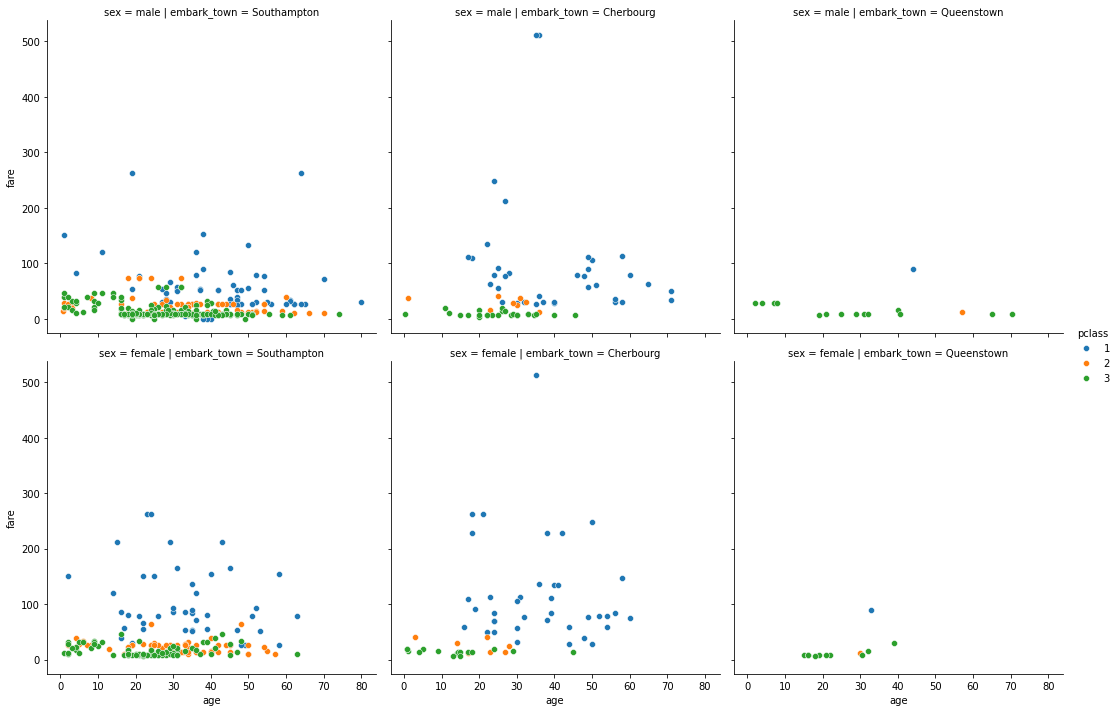

In [ ]:
grid = sns.FacetGrid(data=df, row='sex', col='embark_town', height=5, aspect=1, hue='pclass')
grid.map(sns.scatterplot, 'age', 'fare').add_legend()
plt.show()